In [1]:
# Copyright (c) Microsoft Corporation. All rights reserved
# Licensed under the MIT License.
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
import os
import time

import numpy as np
import matplotlib.pyplot as plt

import rasterio
from rasterio.windows import Window
import shapely
import shapely.geometry
import fiona

from temporal_cluster_matching import utils, DataInterface, algorithms

## NAIP

In [2]:
geoms = utils.get_poultry_barn_geoms("../data/")

areas = []
for geom in geoms:
    shape = shapely.geometry.shape(geom)
    areas.append(shape.area)

lengths = np.sqrt(areas)
mean_length = np.mean(lengths)

In [4]:
lengths.max()
lengths.min()

22.92778452118776

In [5]:
with fiona.open("../data/Delmarva_PL_House_Final2_extent_epsg26918.geojson") as f:
    extent_row = next(iter(f))
    print(f.schema)

{'properties': OrderedDict([('MINX', 'float'), ('MINY', 'float'), ('MAXX', 'float'), ('MAXY', 'float'), ('CNTX', 'float'), ('CNTY', 'float'), ('AREA', 'float'), ('PERIM', 'float'), ('HEIGHT', 'float'), ('WIDTH', 'float')]), 'geometry': 'Polygon'}


In [6]:
minx, miny, maxx, maxy = shapely.geometry.shape(extent_row["geometry"]).bounds
width = maxx-minx
height = maxy-miny

In [7]:
with fiona.open("../data/delmarva_valid_naip_area.geojson") as f:
    valid_polygon = shapely.geometry.shape(next(iter(f))["geometry"])

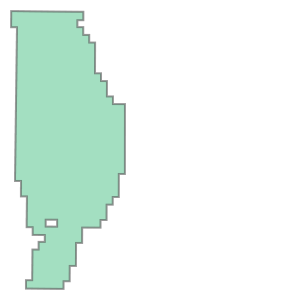

In [8]:
valid_polygon

In [8]:
buffer = 0.05
geoms = []
while len(geoms) < 6013:
    
    length = np.random.choice(lengths)
    
    p_minx = (np.random.random() * width * (1 - buffer*2)) - length + minx + (width * buffer)
    p_miny = (np.random.random() * height * (1 - buffer*2)) - length + miny  + (height * buffer)
    
    p_maxx = p_minx + length
    p_maxy = p_miny + length
    
    
    shape = shapely.geometry.box(p_minx, p_miny, p_maxx, p_maxy)
    
    if valid_polygon.contains(shape):    
        geom = shapely.geometry.mapping(
            shape
        )
        geoms.append(geom)

In [9]:
schema = {
    "properties": {"id": "int"},
    "geometry": "Polygon"
}
with fiona.open("../data/poultry_barn_6013_random_polygons_epsg26918.geojson", "w", driver="GeoJSON", crs="epsg:26918", schema=schema) as f:
    for i, geom in enumerate(geoms):

        f.write({
            "type":"Feature",
            "properties": {"id": i},
            "geometry": geom
        })

## S2

In [9]:
geoms = utils.get_solar_farm_geoms("../data/")

areas = []
for geom in geoms:
    shape = shapely.geometry.shape(geom)
    areas.append(shape.area)

lengths = np.sqrt(areas)
mean_length = np.mean(lengths)

In [10]:
len(geoms)

935

In [11]:
with rasterio.open(DataInterface.S2DataLoader.urls[0]) as f:
    minx, miny, maxx, maxy = f.bounds
    
width = maxx-minx
height = maxy-miny

In [12]:
with fiona.open("../data/solar_farms_valid_s2_area.geojson") as f:
    valid_polygon = shapely.geometry.shape(next(iter(f))["geometry"])

In [8]:
geoms = []
buffer = 0.05
while len(geoms) < 935:
    
    length = np.random.choice(lengths)
    #length = mean_length
    
    p_minx = (np.random.random() * width * (1 - buffer*2)) - length + minx + (width * buffer)
    p_miny = (np.random.random() * height * (1 - buffer*2)) - length + miny  + (height * buffer)
    
    p_maxx = p_minx + length
    p_maxy = p_miny + length
    
    
    shape = shapely.geometry.box(p_minx, p_miny, p_maxx, p_maxy)
    
    if valid_polygon.contains(shape):    
        geom = shapely.geometry.mapping(
            shape
        )
        geoms.append(geom)

In [9]:
schema = {
    "properties": {"id": "int"},
    "geometry": "Polygon"
}
with fiona.open("../data/solar_farms_935_random_polygons_epsg4326.geojson", "w", driver="GeoJSON", crs="epsg:4326", schema=schema) as f:
    for i, geom in enumerate(geoms):

        f.write({
            "type":"Feature",
            "properties": {"id": i},
            "geometry": geom
        })